<center>

# Flight Delay Predict

#### Data Science Bootcamp Capstone Project
#### Elia Abu-Manneh
##### April 12 2023

</center

## Part 2.2: Neural Network Modelling

In [1]:
# Imports

import os
import pandas as pd
import numpy as np
from skimage.io import imread
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras import datasets, layers, models
from IPython.display import clear_output
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K

np.random.seed(0)

%matplotlib inline
import seaborn as sns
import PIL
from PIL import Image
import seaborn as sb

In [2]:
ontime_10423 = pd.read_csv('../processed_data/ontime_10423.csv')

In [3]:
ontime_10423.describe()

,YTD,ORIGIN_AIRPORT_ID,DEP_DELAY,CANCELLED,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,...,DEST_AIRPORT_ID_14869,DEST_AIRPORT_ID_14893,DEST_AIRPORT_ID_14908,DEST_AIRPORT_ID_14986,DEST_AIRPORT_ID_15016,DEST_AIRPORT_ID_15304,DEST_AIRPORT_ID_15370,DEST_AIRPORT_ID_15412,DEST_AIRPORT_ID_15624,DEST_AIRPORT_ID_15919
count,244019.000000,244019.0,239207.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,...,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000
mean,198.873596,10423.0,12.095047,0.019990,0.004094,0.177011,0.028596,0.026387,0.120982,0.000127,...,0.019449,0.004336,0.004996,0.000463,0.013769,0.011983,0.002946,0.000824,0.000582,0.000332
std,107.056546,0.0,51.191644,0.139967,0.063853,0.381679,0.166669,0.160284,0.326107,0.011270,...,0.138098,0.065703,0.070502,0.021514,0.116533,0.108808,0.054202,0.028689,0.024116,0.018216
min,1.000000,10423.0,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,10423.0,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,209.000000,10423.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,293.000000,10423.0,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,365.000000,10423.0,2109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#y1 = ontime_10423.iloc[:,-64:]
y1 = ontime_10423['DEP_DELAY'] #First Variable that we are trying to predict
y1.fillna(0, inplace=True)

y2 = ontime_10423['CANCELLED'] #Second Variable that we are trying to predict
y2.fillna(0, inplace=True)

X_data = ontime_10423.iloc[:,:-64]
X_data.drop(['ORIGIN_AIRPORT_ID','DEP_DELAY','CANCELLED'], axis=1, inplace=True)

In [5]:
X_data.shape

(244019, 43)

In [6]:
X_data.head(4)

,YTD,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_HA,...,DEST_AIRPORT_ID_11042,DEST_AIRPORT_ID_11057,DEST_AIRPORT_ID_11066,DEST_AIRPORT_ID_11193,DEST_AIRPORT_ID_11259,DEST_AIRPORT_ID_11278,DEST_AIRPORT_ID_11292,DEST_AIRPORT_ID_11298,DEST_AIRPORT_ID_11423,DEST_AIRPORT_ID_11433
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y1.min()

-29.0

0.0


Text(0, 0.5, 'Frequency')

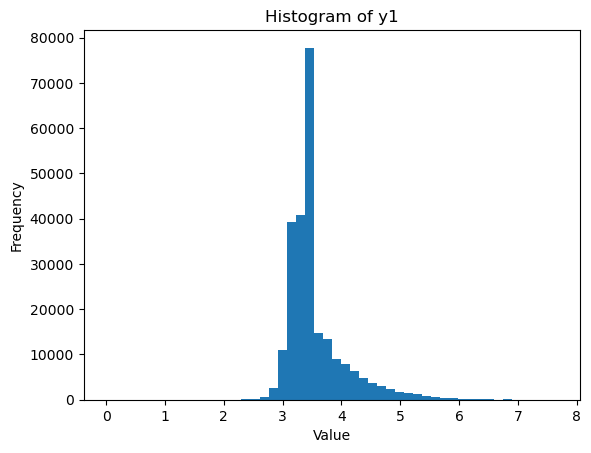

In [8]:
#log transformation of y1
y1 = y1 +29 + 1  #removing any values below 0 by offsetting
print(np.log(y1.min())) #checking for any -inf or negative numbers
#Applying the log transformation
y1 = np.log(y1)

plt.hist(y1, bins = 50)
plt.title('Histogram of y1')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [9]:
# Scale numerical features 
def ytd_scaler(df):
    numerical_cols = ['YTD']
    scaler = MinMaxScaler()
    dfnum = scaler.fit_transform(df[numerical_cols])
    return dfnum

In [10]:
X_num = ytd_scaler(X_data)

In [11]:
X_data.drop(['YTD'], axis=1, inplace=True)

In [12]:
#Combining encoded categorical and scaled numerical features
X = np.concatenate((X_data, X_num), axis=1)

In [13]:
#Checking what the input data looks like
print((X[1]).shape)
print(X[0])

(43,)
[1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.00274725]


### Delay Model

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [15]:
#Defining the model
with tf.device('/device:GPU:0'):
    modely1 = keras.Sequential()

    modely1.add(Dense(128,kernel_initializer='LecunNormal', input_dim=43, activation='relu'))

    modely1.add(Dense(256, kernel_initializer='LecunNormal',activation='relu'))

    modely1.add(Dropout(0.25)) 

    modely1.add(Dense(256, kernel_initializer='LecunNormal',activation='relu'))

    modely1.add(Dropout(0.25)) 

    modely1.add(Dense(256, kernel_initializer='LecunNormal',activation='relu'))
         
    modely1.add(Dense(1, activation='linear'))

    modely1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5632      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 2

In [16]:
def rmse(y_true, y_pred): #defining the Root Mean Squared Error function
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [17]:
# Compile model
#model.compile(loss=CategoricalCrossentropy,optimizer='adam', metrics=['accuracy'])
with tf.device('/device:GPU:0'):
    modely1.compile(
        optimizer='adam',  # using the Adam optimizer
        loss='mean_squared_error',  # using mean squared error as the loss function
        metrics=[rmse]  # using mean squared error as the evaluation metric
    )

In [18]:
# Train the model and store the history
with tf.device('/device:GPU:0'):
    historyy1 = modely1.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
6101/6101 [==============================] - 41s 6ms/step - loss: 0.2835 - rmse: 0.5096 - val_loss: 0.2438 - val_rmse: 0.4784
Epoch 2/8
6101/6101 [==============================] - 37s 6ms/step - loss: 0.2498 - rmse: 0.4845 - val_loss: 0.2440 - val_rmse: 0.4774
Epoch 3/8
6101/6101 [==============================] - 37s 6ms/step - loss: 0.2495 - rmse: 0.4849 - val_loss: 0.2498 - val_rmse: 0.4818
Epoch 4/8
6101/6101 [==============================] - 38s 6ms/step - loss: 0.2489 - rmse: 0.4840 - val_loss: 0.2447 - val_rmse: 0.4808
Epoch 5/8
6101/6101 [==============================] - 37s 6ms/step - loss: 0.2488 - rmse: 0.4835 - val_loss: 0.2442 - val_rmse: 0.4794
Epoch 6/8
6101/6101 [==============================] - 37s 6ms/step - loss: 0.2484 - rmse: 0.4829 - val_loss: 0.2430 - val_rmse: 0.4766
Epoch 7/8
6101/6101 [==============================] - 38s 6ms/step - loss: 0.2484 - rmse: 0.4832 - val_loss: 0.2442 - val_rmse: 0.4777
Epoch 8/8
6101/6101 [===========================

In [22]:
#manually checking the loss values
dfy1 = pd.DataFrame(historyy1.history)
dfy1.head(3)

,loss,rmse,val_loss,val_rmse
0,0.283498,0.509569,0.243841,0.478423
1,0.249831,0.484455,0.244043,0.477432
2,0.249512,0.484865,0.249755,0.481782


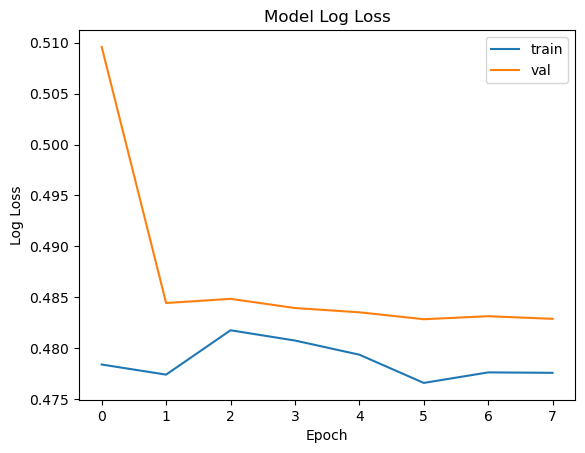

In [23]:
#plotting the training and validation loss over the epochs
plt.plot(historyy1.history['val_rmse'])
plt.plot(historyy1.history['rmse'])
plt.title('Model Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [24]:
#exponentiating the loss values back to minutes
dfy1 = pd.DataFrame(historyy1.history)
dfy1 = dfy1.applymap(lambda x: np.exp(x))
dfy1.head(3)

,loss,rmse,val_loss,val_rmse
0,1.327766,1.664574,1.276141,1.613529
1,1.283809,1.623290,1.276400,1.611930
2,1.283399,1.623955,1.283711,1.618957


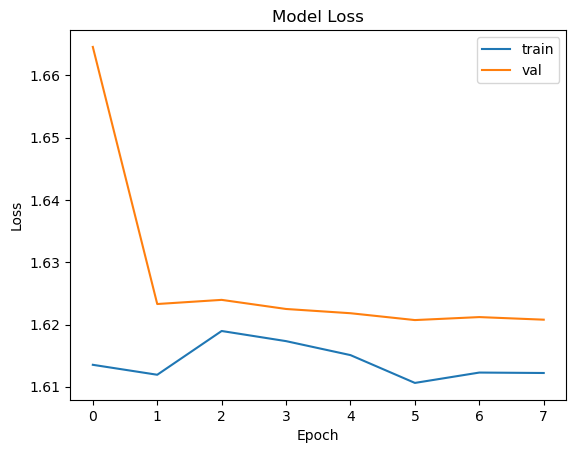

In [25]:
plt.plot(dfy1['val_rmse'])
plt.plot(dfy1['rmse'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [26]:
def get_pred_delay(row_number):
    new_data = X[row_number].reshape(-1,43)  #sample input
    #type(X[1]) is an numpy.ndarray

    # Make prediction with the model
    raw_prediction = modely1.predict(new_data)
    #print(raw_prediction)

    ylabels= ontime_10423['DEP_DELAY']
    correct_label = ylabels[row_number]

    tranformed_prediction = np.exp(raw_prediction) -30
    return tranformed_prediction, correct_label

In [30]:
r = 7058 #row number - example of an input data
print(get_pred_delay(r)[0])
print(get_pred_delay(r)[1])

1/1 [==============================] - 0s 38ms/step
[[3.3772354]]
1/1 [==============================] - 0s 51ms/step
11.0


In [33]:
# Evaluating the model
scores = modely1.evaluate(X_test, y_test)
print(scores)
print("MSE:", scores[0])
print("MAE:", scores[1])
print("RMSE:", np.sqrt(scores[0]))

1526/1526 [==============================] - 4s 3ms/step - loss: 0.2431 - rmse: 0.4776
[0.24305462837219238, 0.4776080250740051]
MSE: 0.24305462837219238
MAE: 0.4776080250740051
RMSE: 0.49300570825518075


In [34]:
#Saving the model
modely1.save('../bin/modely1.h5')

### Cancellation Model

In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

In [37]:
#Defining the model
with tf.device('/device:GPU:0'):
    modely2 = keras.Sequential()

    modely2.add(Dense(128,kernel_initializer='LecunNormal', input_dim=43, activation='relu'))

    modely2.add(Dense(256, kernel_initializer='LecunNormal',activation='relu'))

    modely2.add(Dropout(0.25)) 

    modely2.add(Dense(256, kernel_initializer='LecunNormal',activation='relu'))

    modely2.add(Dropout(0.25)) 

    modely2.add(Dense(256, kernel_initializer='LecunNormal',activation='relu'))
         
    modely2.add(Dense(1, activation='linear'))

    modely2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               5632      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                

In [38]:
def rmse(y_true, y_pred): #defining the Root Mean Squared Error function
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
# Compile model
#model.compile(loss=CategoricalCrossentropy,optimizer='adam', metrics=['accuracy'])
with tf.device('/device:GPU:0'):
    modely2.compile(
        optimizer='adam',  # using the Adam optimizer
        loss='mean_squared_error',  # using mean squared error as the loss function
        metrics=[rmse]  # using mean squared error as the evaluation metric
    )

In [40]:
# Train the model and store the history
with tf.device('/device:GPU:0'):
    historyy2 = modely2.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/8
6101/6101 [==============================] - 38s 6ms/step - loss: 0.0195 - rmse: 0.1041 - val_loss: 0.0203 - val_rmse: 0.1046
Epoch 2/8
6101/6101 [==============================] - 35s 6ms/step - loss: 0.0194 - rmse: 0.1043 - val_loss: 0.0203 - val_rmse: 0.1065
Epoch 3/8
6101/6101 [==============================] - 36s 6ms/step - loss: 0.0194 - rmse: 0.1043 - val_loss: 0.0203 - val_rmse: 0.1070
Epoch 4/8
6101/6101 [==============================] - 36s 6ms/step - loss: 0.0194 - rmse: 0.1052 - val_loss: 0.0202 - val_rmse: 0.1062
Epoch 5/8
6101/6101 [==============================] - 41s 7ms/step - loss: 0.0193 - rmse: 0.1049 - val_loss: 0.0202 - val_rmse: 0.1069
Epoch 6/8
6101/6101 [==============================] - 40s 6ms/step - loss: 0.0193 - rmse: 0.1049 - val_loss: 0.0202 - val_rmse: 0.1054
Epoch 7/8
6101/6101 [==============================] - 37s 6ms/step - loss: 0.0193 - rmse: 0.1056 - val_loss: 0.0202 - val_rmse: 0.1090
Epoch 8/8
6101/6101 [===========================

In [41]:
#manually checking the loss values
dfy2 = pd.DataFrame(historyy2.history)
dfy2.head(3)

,loss,rmse,val_loss,val_rmse
0,0.019455,0.104118,0.020322,0.104561
1,0.019374,0.104318,0.020263,0.106483
2,0.019363,0.104318,0.020255,0.106967


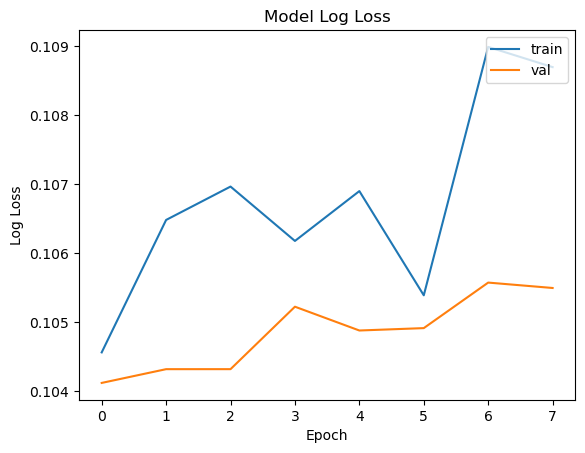

In [42]:
#plotting the training and validation loss over the epochs
plt.plot(historyy2.history['val_rmse'])
plt.plot(historyy2.history['rmse'])
plt.title('Model Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [43]:
def get_pred_cancel(row_number):
    new_data = X[row_number].reshape(-1,43)  #sample input
    #type(X[1]) is an numpy.ndarray

    # Make prediction with the model
    raw_prediction = modely2.predict(new_data)
    #print(raw_prediction)

    ylabels= ontime_10423['CANCELLED']
    correct_label = ylabels[row_number]
    
    return raw_prediction, correct_label

In [44]:
r = 40 #row number - example of an input data
print(get_pred_cancel(r)[0])
print(get_pred_cancel(r)[1])

1/1 [==============================] - 0s 150ms/step
[[0.03032076]]
1/1 [==============================] - 0s 32ms/step
0.0


1/1 [==============================] - 0s 49ms/step


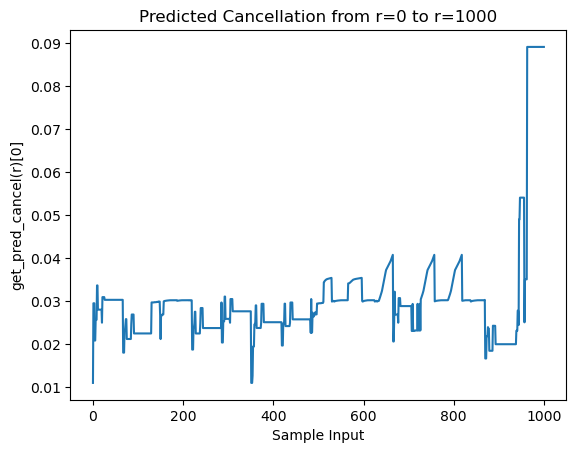

In [45]:
#Checking cancellation frequency

#defining the range of values for r
r_values = range(0, 1001)

#creating a sample list of y_values 
y_values = [get_pred_cancel(r)[0].reshape(1,) for r in r_values]

#plotting
plt.plot(r_values, y_values)
plt.xlabel('Sample Input')
plt.ylabel('get_pred_cancel(r)[0]')
plt.title('Predicted Cancellation from r=0 to r=1000')
plt.show()

In [46]:
#Saving the model
modely2.save('../bin/modely2.h5')